In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

### Import Libraries and Define Auxiliary Functions


In [2]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


 Visualize the relationship between Flight Number and Pay load Mass


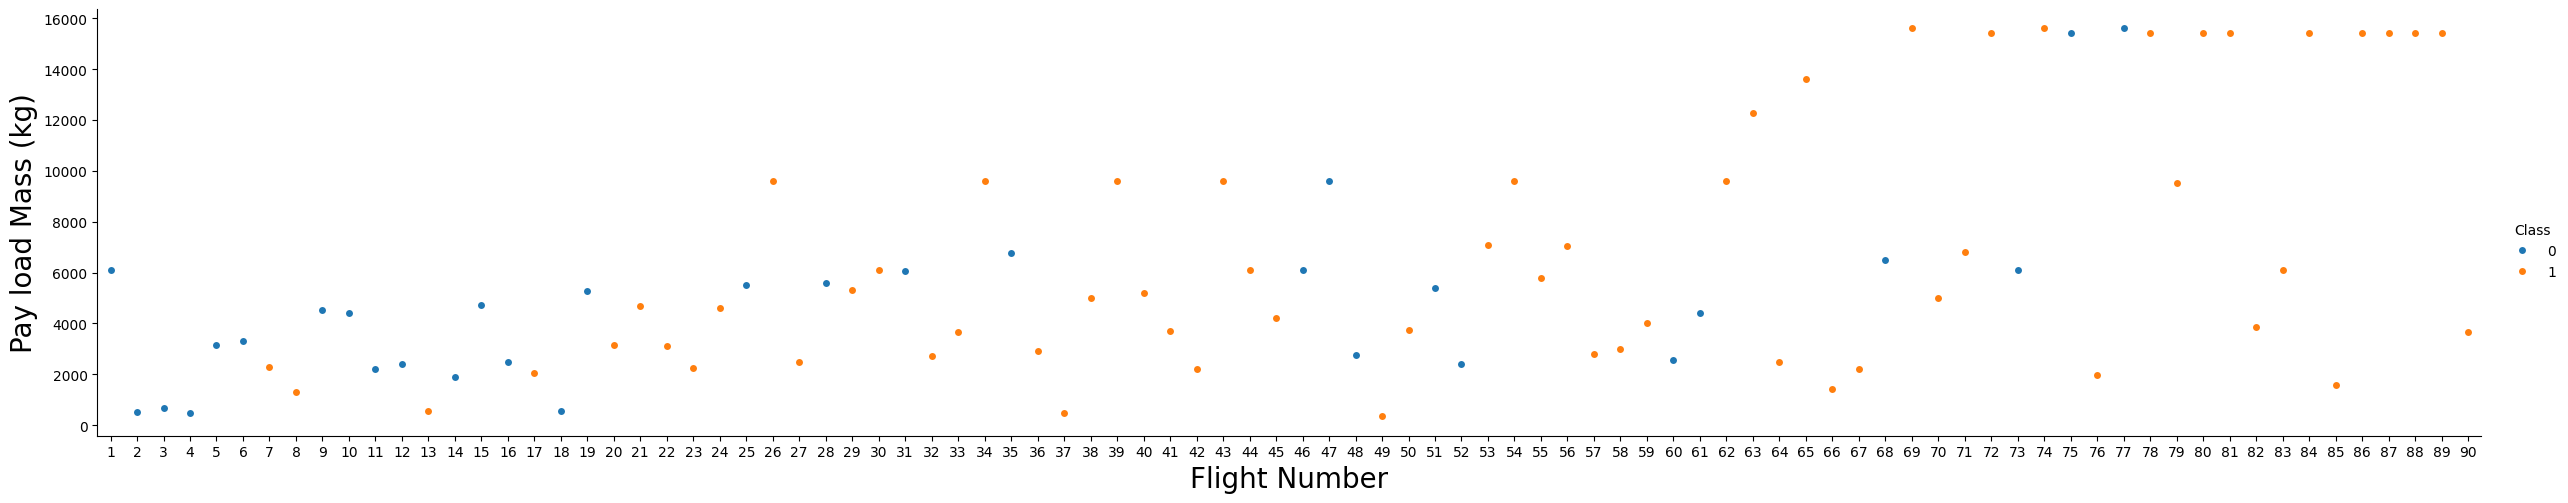

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

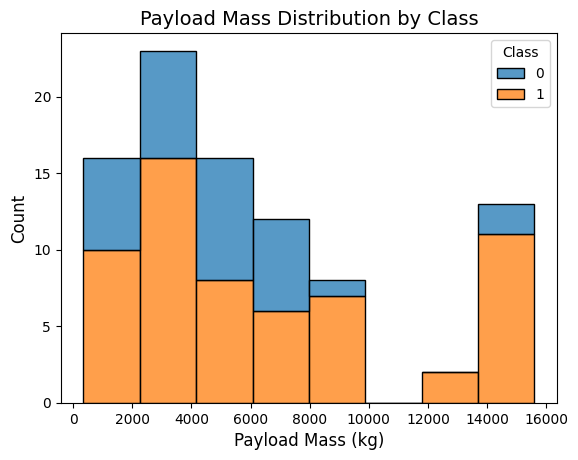

In [5]:
sns.histplot(data=df, x="PayloadMass", hue="Class", multiple="stack")
plt.xlabel("Payload Mass (kg)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Payload Mass Distribution by Class", fontsize=14)
plt.show()


 Visualize the relationship between Flight Number and Launch Site


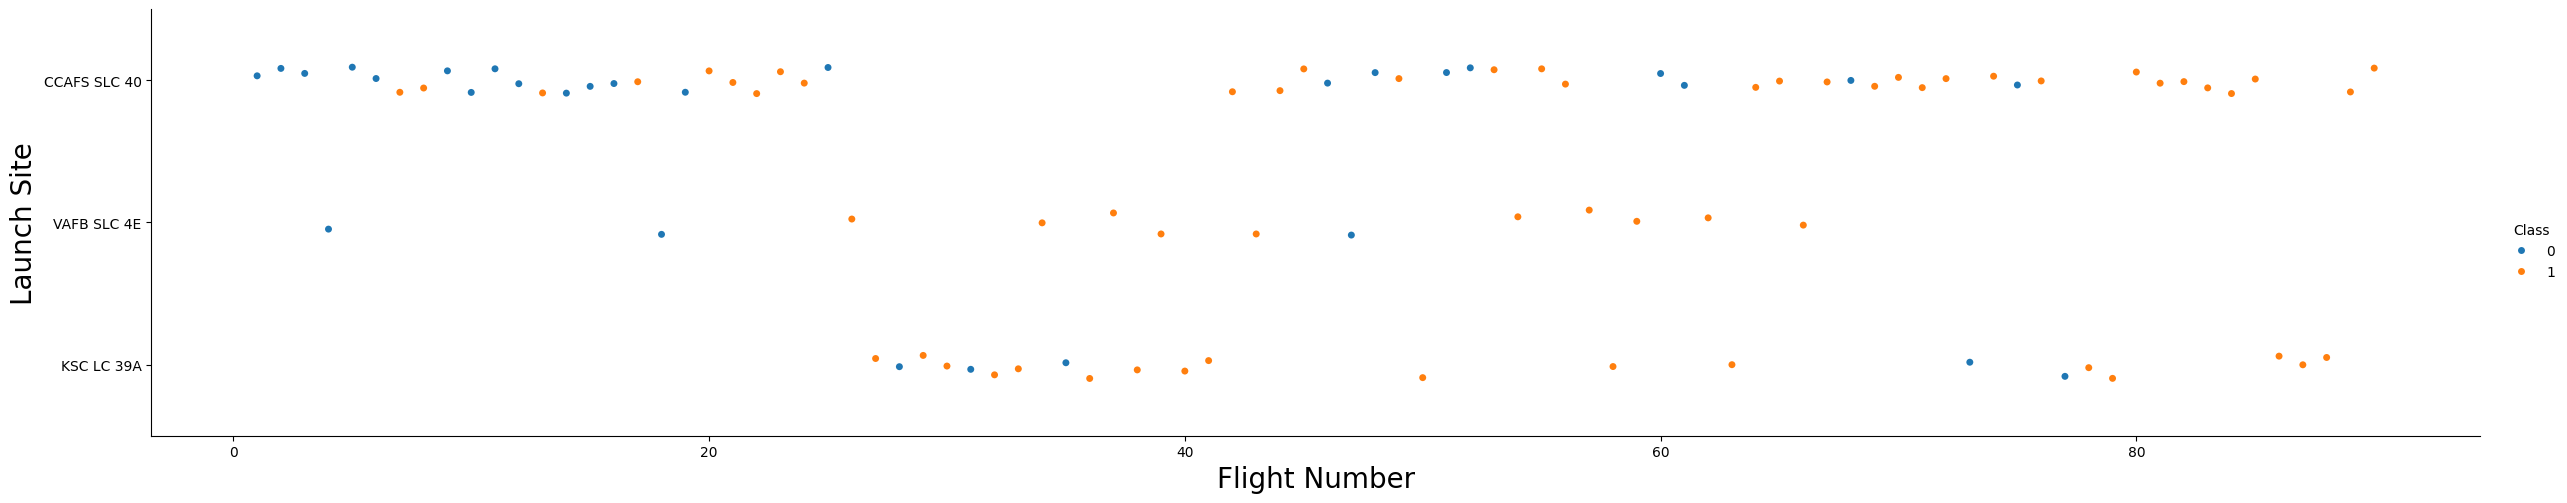

In [6]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()


In [7]:
# Group data by Launch Site and calculate the mean of Class (success rate)
launch_site_success_rate = df.groupby('LaunchSite')['Class'].mean()

# Print the success rate for each launch site
for launch_site, success_rate in launch_site_success_rate.items():
    print(f"Success rate for {launch_site}: {success_rate * 100:.2f}%")


Success rate for CCAFS SLC 40: 60.00%
Success rate for KSC LC 39A: 77.27%
Success rate for VAFB SLC 4E: 76.92%


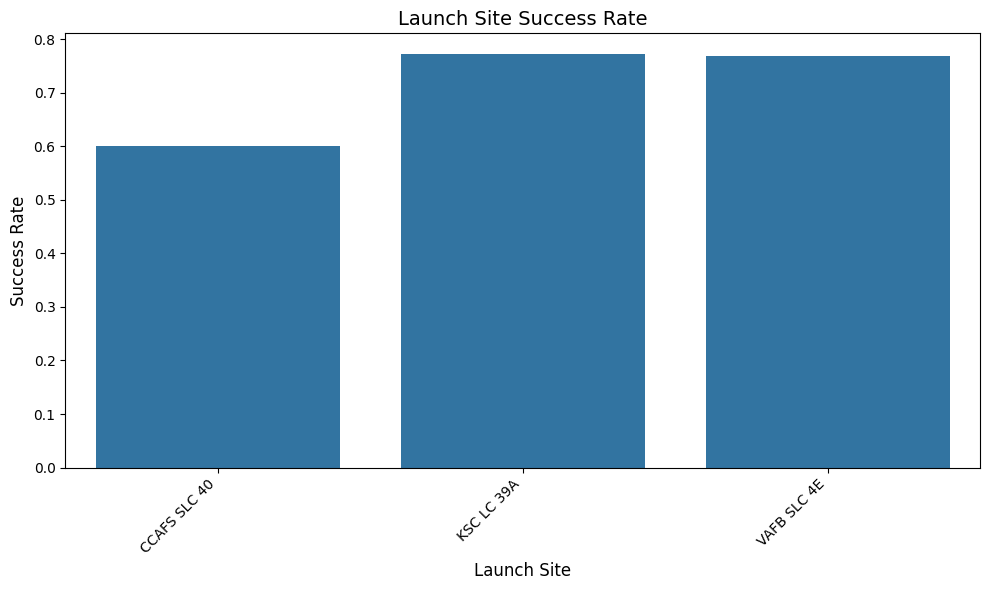

In [8]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=launch_site_success_rate.index, y=launch_site_success_rate.values)
plt.xlabel("Launch Site", fontsize=12)
plt.ylabel("Success Rate", fontsize=12)
plt.title("Launch Site Success Rate", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


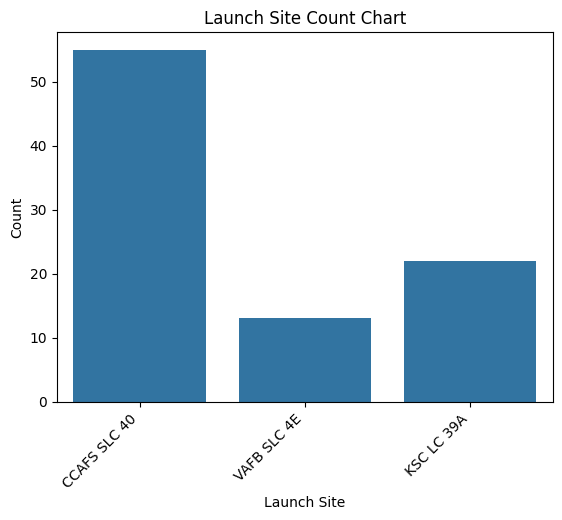

In [9]:
sns.countplot(x='LaunchSite', data=df)
plt.xlabel('Launch Site')
plt.ylabel('Count')
plt.title('Launch Site Count Chart')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


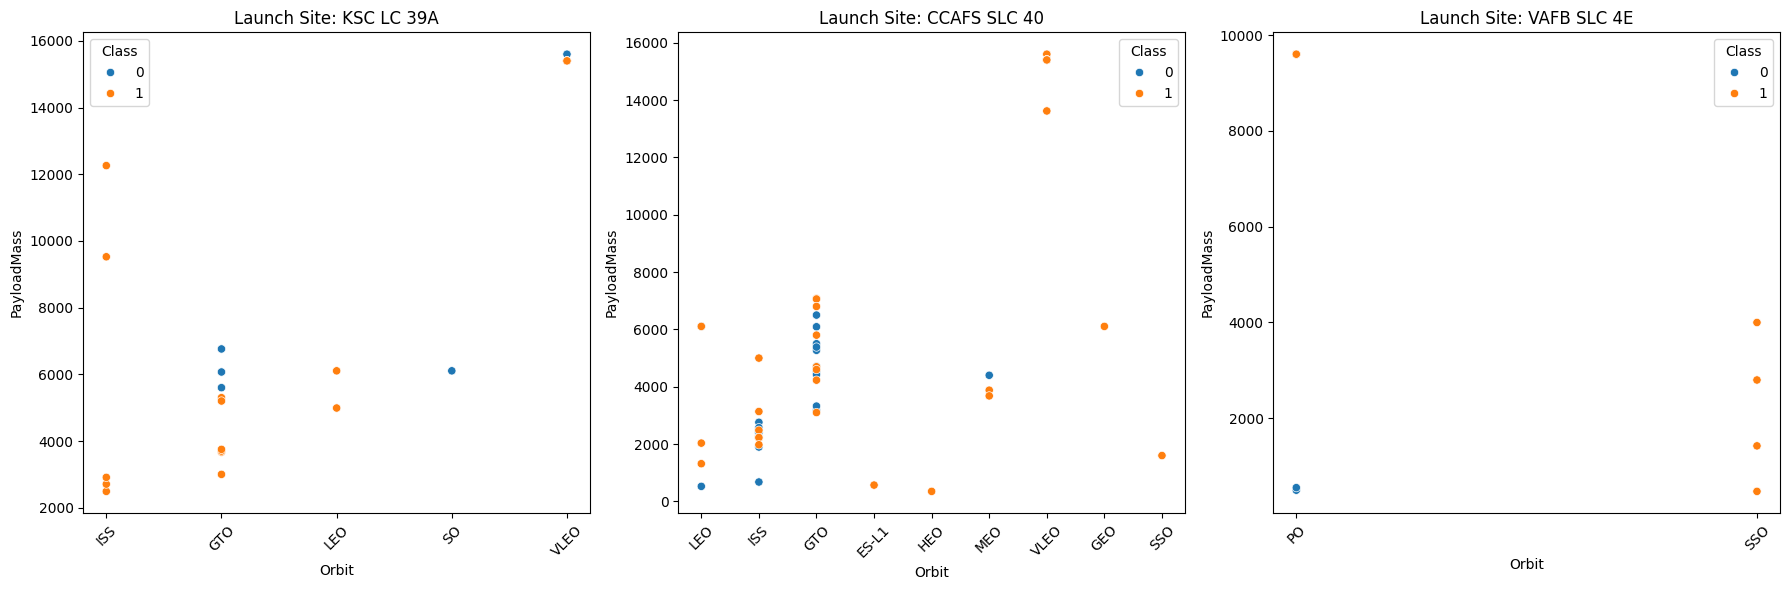

In [10]:
launch_sites = ['KSC LC 39A', 'CCAFS SLC 40', 'VAFB SLC 4E']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create subplots

for i, launch_site in enumerate(launch_sites):
    sns.scatterplot(x='Orbit', y='PayloadMass', hue='Class', data=df[df['LaunchSite'] == launch_site], ax=axes[i])
    axes[i].set_title(f'Launch Site: {launch_site}')
    axes[i].set_xlabel('Orbit')
    axes[i].set_ylabel('PayloadMass')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


 Visualize the relationship between Payload and Launch Site






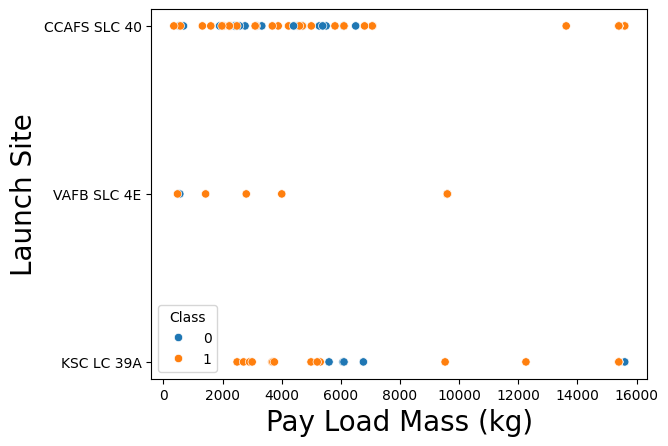

In [11]:
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()


### Visualize the relationship between success rate of each orbit type








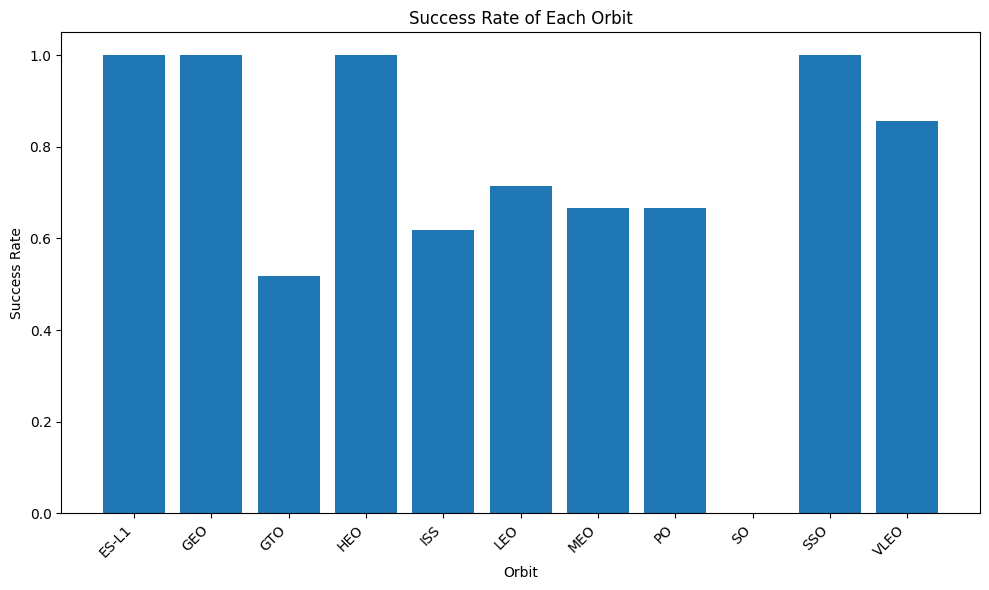

In [12]:
# Group data by Orbit and calculate the mean of Class (success rate)
orbit_success_rate = df.groupby('Orbit')['Class'].mean()

# Create bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(orbit_success_rate.index, orbit_success_rate.values)
plt.xlabel("Orbit")
plt.ylabel("Success Rate")
plt.title("Success Rate of Each Orbit")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


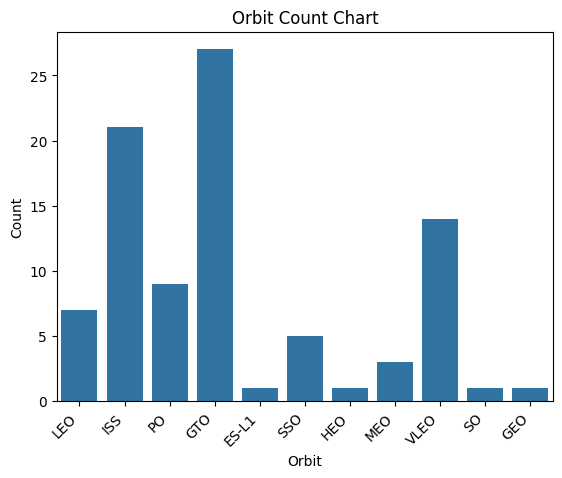

In [13]:
sns.countplot(x='Orbit', data=df)
plt.xlabel('Orbit')
plt.ylabel('Count')
plt.title('Orbit Count Chart')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [14]:
orbit_success_rate = df.groupby('Orbit')['Class'].mean()
for orbit, success_rate in orbit_success_rate.items():
    print(f"Orbit: {orbit}, Success Rate: {success_rate * 100:.2f}%")


Orbit: ES-L1, Success Rate: 100.00%
Orbit: GEO, Success Rate: 100.00%
Orbit: GTO, Success Rate: 51.85%
Orbit: HEO, Success Rate: 100.00%
Orbit: ISS, Success Rate: 61.90%
Orbit: LEO, Success Rate: 71.43%
Orbit: MEO, Success Rate: 66.67%
Orbit: PO, Success Rate: 66.67%
Orbit: SO, Success Rate: 0.00%
Orbit: SSO, Success Rate: 100.00%
Orbit: VLEO, Success Rate: 85.71%


 Visualize the relationship between success rate of each landigPad type


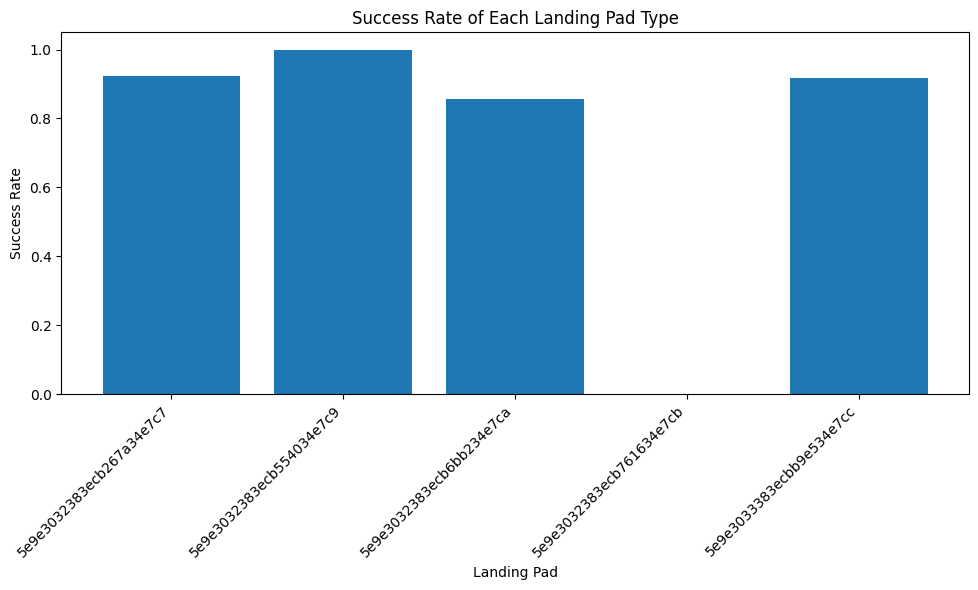

In [15]:
# Group data by LandingPad and calculate the mean of Class (success rate)
landing_pad_success_rate = df.groupby('LandingPad')['Class'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(landing_pad_success_rate.index, landing_pad_success_rate.values)
plt.xlabel("Landing Pad")
plt.ylabel("Success Rate")
plt.title("Success Rate of Each Landing Pad Type")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


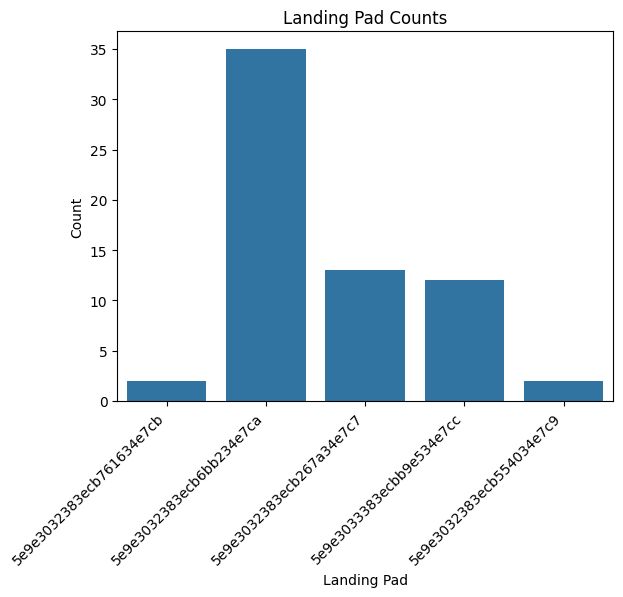

In [16]:
sns.countplot(x='LandingPad', data=df)
plt.xlabel('Landing Pad')
plt.ylabel('Count')
plt.title('Landing Pad Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


### Visualize the relationship between FlightNumber and Orbit type


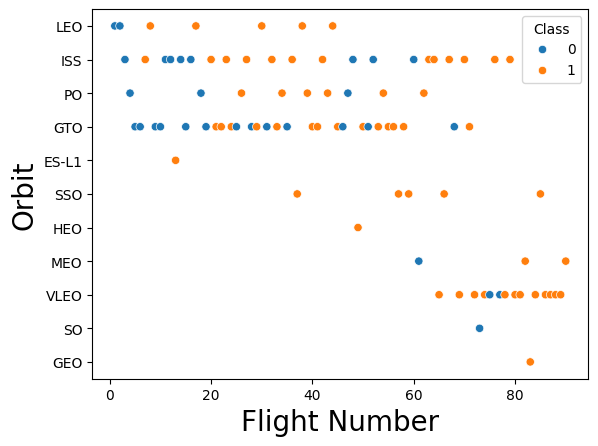

In [17]:
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


###  Visualize the relationship between Payload and Orbit type


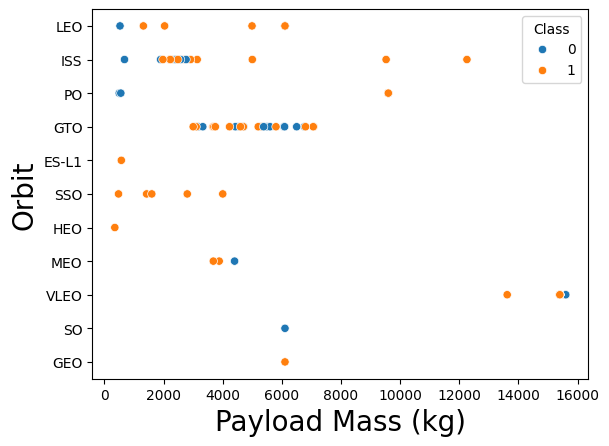

In [18]:
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


###  Visualize the launch success yearly trend


In [19]:
# A function to Extract years from the date
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year


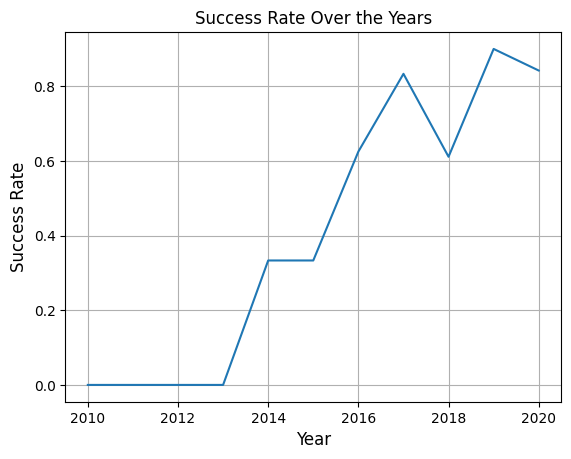

In [20]:
# Extract year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculate success rate per year
year_success_rate = df.groupby('Year')['Class'].mean()

# Create line chart
plt.plot(year_success_rate.index, year_success_rate.values)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Success Rate", fontsize=12)
plt.title("Success Rate Over the Years")
plt.grid(True)  # Add grid for better readability
plt.show()

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


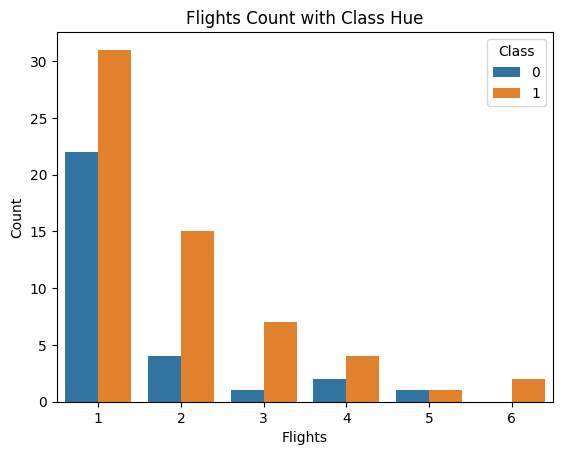

In [21]:
sns.countplot(x='Flights', hue='Class', data=df)
plt.xlabel('Flights')
plt.ylabel('Count')
plt.title('Flights Count with Class Hue')
plt.show()


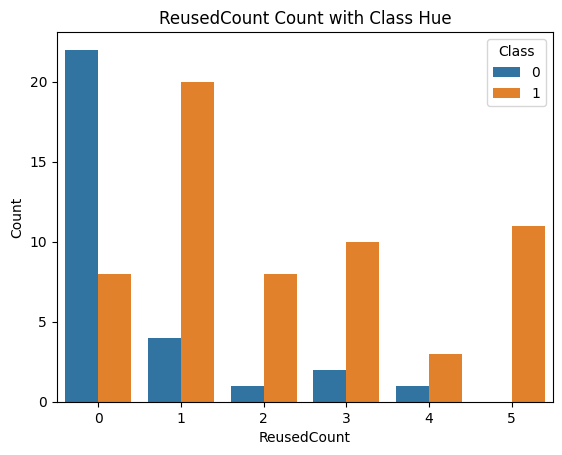

In [22]:
sns.countplot(x='ReusedCount', hue='Class', data=df)
plt.xlabel('ReusedCount')
plt.ylabel('Count')
plt.title('ReusedCount Count with Class Hue')
plt.show()


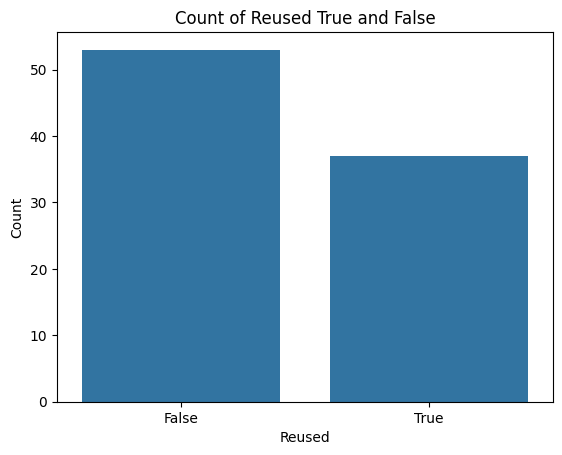

In [23]:
sns.countplot(x='Reused', data=df)
plt.xlabel('Reused')
plt.ylabel('Count')
plt.title('Count of Reused True and False')
plt.show()


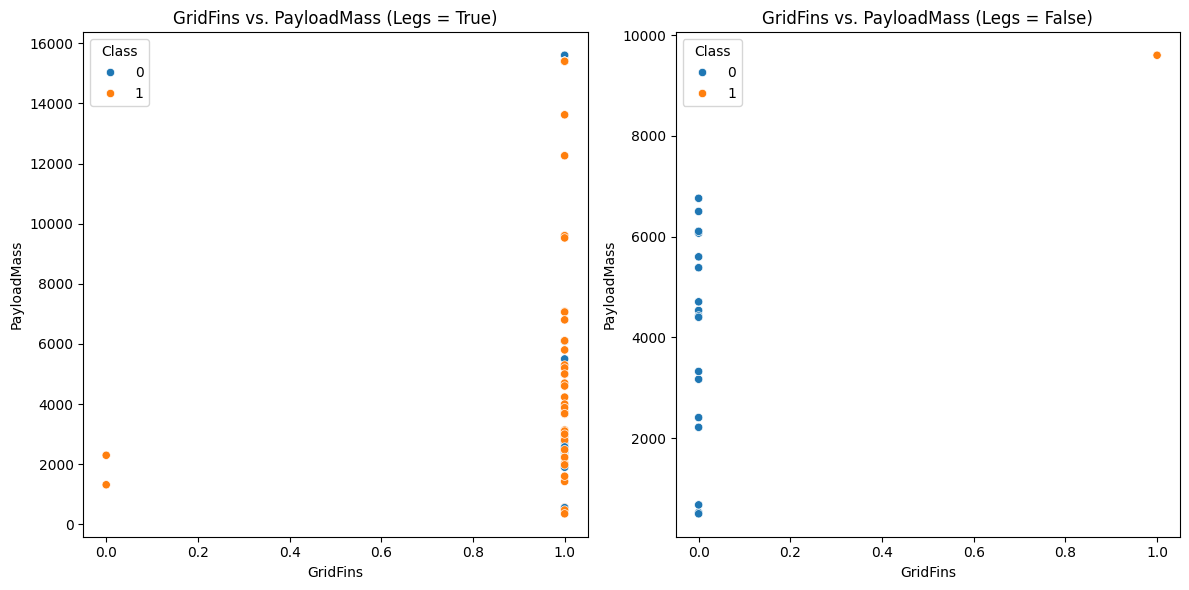

In [24]:
# Create subplots for Legs = True and Legs = False
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Legs = True
sns.scatterplot(x='GridFins', y='PayloadMass', hue='Class', data=df[df['Legs'] == True], ax=axes[0])
axes[0].set_title('GridFins vs. PayloadMass (Legs = True)')
axes[0].set_xlabel('GridFins')
axes[0].set_ylabel('PayloadMass')

# Plot for Legs = False
sns.scatterplot(x='GridFins', y='PayloadMass', hue='Class', data=df[df['Legs'] == False], ax=axes[1])
axes[1].set_title('GridFins vs. PayloadMass (Legs = False)')
axes[1].set_xlabel('GridFins')
axes[1].set_ylabel('PayloadMass')

plt.tight_layout()
plt.show()


In [25]:
gridfins_counts = df['GridFins'].value_counts()

print(gridfins_counts)


GridFins
True     70
False    20
Name: count, dtype: int64


In [26]:
legs_counts = df['Legs'].value_counts()

print(legs_counts)


Legs
True     71
False    19
Name: count, dtype: int64


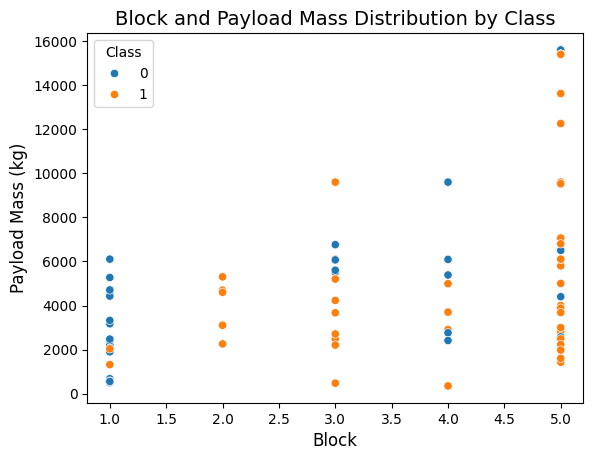

In [27]:
sns.scatterplot(data=df, x="Block", y="PayloadMass", hue="Class")
plt.xlabel("Block", fontsize=12)
plt.ylabel("Payload Mass (kg)", fontsize=12)
plt.title("Block and Payload Mass Distribution by Class", fontsize=14)
plt.show()


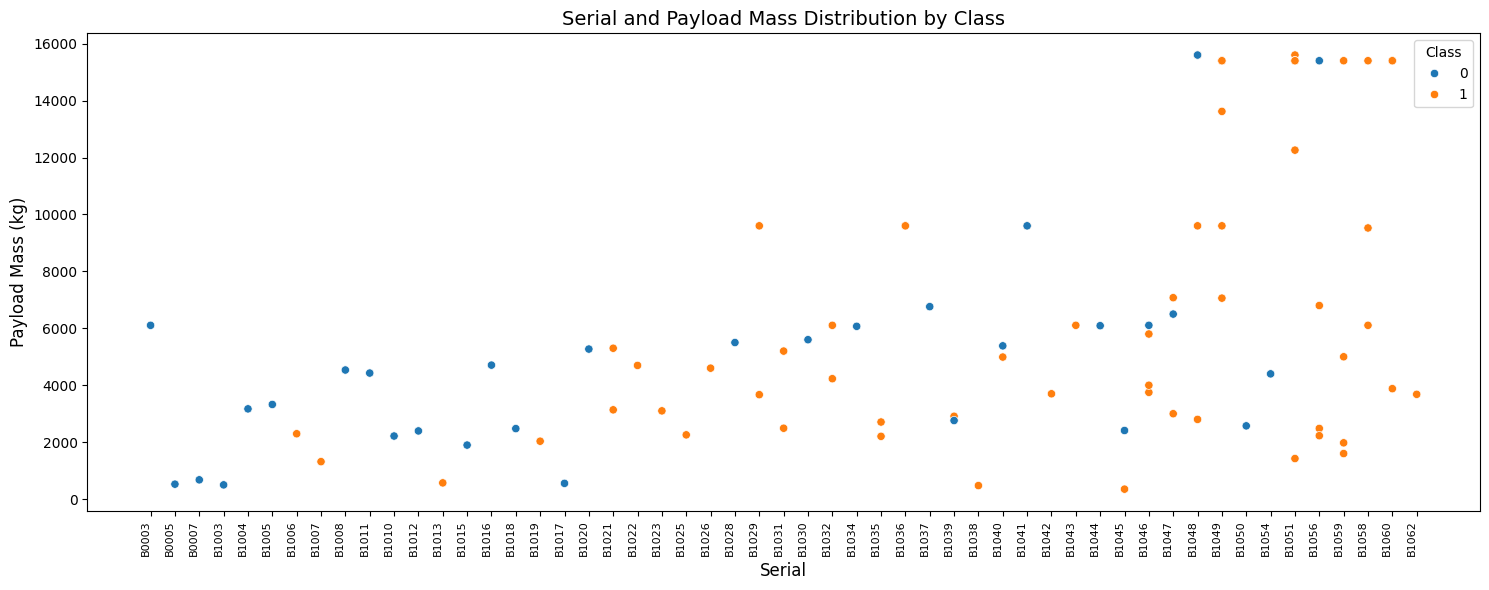

In [28]:
plt.figure(figsize=(15, 6))  # Adjust figure size for better visibility
sns.scatterplot(data=df, x="Serial", y="PayloadMass", hue="Class")
plt.xlabel("Serial", fontsize=12)
plt.ylabel("Payload Mass (kg)", fontsize=12)
plt.title("Serial and Payload Mass Distribution by Class", fontsize=14)

# Rotate and adjust x-axis labels for visibility
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()
plt.show()


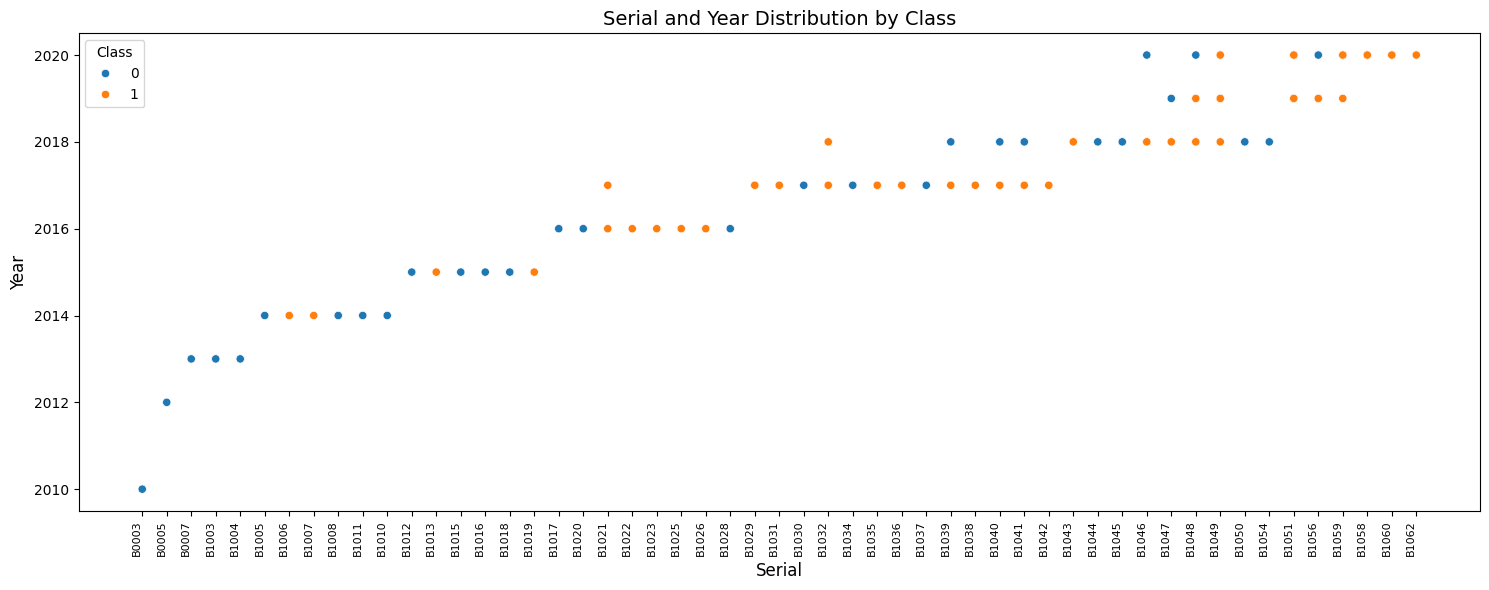

In [29]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Create a scatter plot with hue, Serial on the x-axis, and Year on the y-axis
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x="Serial", y="Year", hue="Class")
plt.xlabel("Serial", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.title("Serial and Year Distribution by Class", fontsize=14)

# Rotate and adjust x-axis labels for visibility
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()
plt.show()


## Features Engineering


In [30]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ###  Create dummy variables to categorical columns


In [31]:
features_one_hot=pd.get_dummies(['Orbit', 'LaunchSite',  'GridFins', 'Reused', 'Legs', 'LandingPad','Serial'])


### Cast all numeric columns to `float64`


In [32]:
features_one_hot = features_one_hot.astype('float64')


In [33]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)
